# Importing the libraires

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the data

In [2]:
data = pd.read_csv('restaurants_with_sentiment.csv')
data.head()

,Restaurant_Name,Category,Address,Province,Latitude,Longitude,Rating,Review,Sentiment_score,Sentiment
0,Wendy's (10365 111th Street),Fast food,"10365 111th Street, Edmonton, AB T5K 2V3",AB,53.545878,-113.510914,5,the food met my expectation the seating area w...,0.9607,Good
1,Wendy's (10365 111th Street),Fast food,"10365 111th Street, Edmonton, AB T5K 2V3",AB,53.545878,-113.510914,2,its a wendys their food is good better than mc...,0.1966,Bad
2,Wendy's (10365 111th Street),Fast food,"10365 111th Street, Edmonton, AB T5K 2V3",AB,53.545878,-113.510914,3,i love the taste of this food as it tastes lik...,0.8198,Good
3,Wendy's (10365 111th Street),Fast food,"10365 111th Street, Edmonton, AB T5K 2V3",AB,53.545878,-113.510914,5,this is the best wendys ive ever been to incre...,0.9287,Good
4,Wendy's (10365 111th Street),Fast food,"10365 111th Street, Edmonton, AB T5K 2V3",AB,53.545878,-113.510914,5,i been here so many times i never had a proble...,0.5613,Good


# checking the shape of dataset

In [3]:
data.shape

(5020, 10)

there are total 5020 samples with 10 features.



In [4]:
data.columns

Index(['Restaurant_Name', 'Category', 'Address', 'Province', 'Latitude',
       'Longitude', 'Rating', 'Review', 'Sentiment_score', 'Sentiment'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Restaurant_Name  5020 non-null   object 
 1   Category         5020 non-null   object 
 2   Address          5020 non-null   object 
 3   Province         5020 non-null   object 
 4   Latitude         5020 non-null   float64
 5   Longitude        5020 non-null   float64
 6   Rating           5020 non-null   int64  
 7   Review           5009 non-null   object 
 8   Sentiment_score  5020 non-null   float64
 9   Sentiment        5020 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 392.3+ KB


#2. Data Cleaning
# 2.1 checking the missing values

In [6]:
data.isnull().sum()

Restaurant_Name     0
Category            0
Address             0
Province            0
Latitude            0
Longitude           0
Rating              0
Review             11
Sentiment_score     0
Sentiment           0
dtype: int64

Review columns has 11 missing values so we will need to handle that

In [7]:
data.dropna(inplace = True)

In [8]:
data.isnull().sum()

Restaurant_Name    0
Category           0
Address            0
Province           0
Latitude           0
Longitude          0
Rating             0
Review             0
Sentiment_score    0
Sentiment          0
dtype: int64

Now there is no null value

# checking the duplicates, handling the duplicates values, removing special charcters and numerical values  

In [9]:
data.duplicated().sum()

204

In [10]:
data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

In [11]:
data['Rating'].unique()

array([5, 2, 3, 4, 1])

In [12]:
data['Rating'] = data['Rating'].apply(lambda x: float(x))
data['Rating']

0       5.0
1       2.0
2       3.0
3       5.0
4       5.0
       ... 
5015    5.0
5016    5.0
5017    5.0
5018    5.0
5019    5.0
Name: Rating, Length: 4805, dtype: float64

In [13]:
data["Review"].unique()

array(['the food met my expectation the seating area was clean and comfortable the staff member who helped me was wearing a mask it was difficult to assess her demeanor but over a nice person i am happy to recommend this restaurant to my friends and family',
       'its a wendys their food is good better than mcdonalds usually that being said youre probably wondering ok so why a 25\r\n\r\nheres the thing they miss items in orders rather often often as in 95 of the orders ive made here have had missing items or been just completely wrong\r\nof course the reason for this issue could be any number of things it could be point of sale or just lack of coordination or anything else all i know is that this has not improved with time\r\n\r\ni just want my darn large chocolate frosty its on the receipt theres a spoon in the bag but no frosty to be found\r\ni dont know what i should expect continually ordering here but i just want the friggin frosty i ordered i mean seriously thats the item wendy

In [14]:
import re

In [15]:
def remove_special_characters(text):
    # Regular expression to keep only alphanumeric characters and spaces
    cleaned_text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    # Remove extra spaces resulting from character removal
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    return cleaned_text.strip()

data['Review'] = data['Review'].apply(remove_special_characters)


In [16]:
data["Review"].unique()

array(['the food met my expectation the seating area was clean and comfortable the staff member who helped me was wearing a mask it was difficult to assess her demeanor but over a nice person i am happy to recommend this restaurant to my friends and family',
       'its a wendys their food is good better than mcdonalds usually that being said youre probably wondering ok so why a 25 heres the thing they miss items in orders rather often often as in 95 of the orders ive made here have had missing items or been just completely wrong of course the reason for this issue could be any number of things it could be point of sale or just lack of coordination or anything else all i know is that this has not improved with time i just want my darn large chocolate frosty its on the receipt theres a spoon in the bag but no frosty to be found i dont know what i should expect continually ordering here but i just want the friggin frosty i ordered i mean seriously thats the item wendys is known for its p

In [17]:
data.head()

,Restaurant_Name,Category,Address,Province,Latitude,Longitude,Rating,Review,Sentiment_score,Sentiment
0,Wendy's (10365 111th Street),Fast food,"10365 111th Street, Edmonton, AB T5K 2V3",AB,53.545878,-113.510914,5.0,the food met my expectation the seating area w...,0.9607,Good
1,Wendy's (10365 111th Street),Fast food,"10365 111th Street, Edmonton, AB T5K 2V3",AB,53.545878,-113.510914,2.0,its a wendys their food is good better than mc...,0.1966,Bad
2,Wendy's (10365 111th Street),Fast food,"10365 111th Street, Edmonton, AB T5K 2V3",AB,53.545878,-113.510914,3.0,i love the taste of this food as it tastes lik...,0.8198,Good
3,Wendy's (10365 111th Street),Fast food,"10365 111th Street, Edmonton, AB T5K 2V3",AB,53.545878,-113.510914,5.0,this is the best wendys ive ever been to incre...,0.9287,Good
4,Wendy's (10365 111th Street),Fast food,"10365 111th Street, Edmonton, AB T5K 2V3",AB,53.545878,-113.510914,5.0,i been here so many times i never had a proble...,0.5613,Good


In [18]:
data.to_csv('cleaned_data.csv', index=False)

In [19]:
data.Sentiment[data.Sentiment == 'Good'] = 1
data.Sentiment[data.Sentiment == 'Bad'] =  0

<ipython-input-19-d2bdcb49edff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Sentiment[data.Sentiment == 'Good'] = 1
<ipython-input-19-d2bdcb49edff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Sentiment[data.Sentiment == 'Bad'] =  0


In [20]:
data.Sentiment.value_counts()

1    3533
0    1272
Name: Sentiment, dtype: int64

#Label Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.Province = le.fit_transform(data.Province)
data.Category = le.fit_transform(data.Category)

data.head()

,Restaurant_Name,Category,Address,Province,Latitude,Longitude,Rating,Review,Sentiment_score,Sentiment
0,Wendy's (10365 111th Street),41,"10365 111th Street, Edmonton, AB T5K 2V3",0,53.545878,-113.510914,5.0,the food met my expectation the seating area w...,0.9607,1
1,Wendy's (10365 111th Street),41,"10365 111th Street, Edmonton, AB T5K 2V3",0,53.545878,-113.510914,2.0,its a wendys their food is good better than mc...,0.1966,0
2,Wendy's (10365 111th Street),41,"10365 111th Street, Edmonton, AB T5K 2V3",0,53.545878,-113.510914,3.0,i love the taste of this food as it tastes lik...,0.8198,1
3,Wendy's (10365 111th Street),41,"10365 111th Street, Edmonton, AB T5K 2V3",0,53.545878,-113.510914,5.0,this is the best wendys ive ever been to incre...,0.9287,1
4,Wendy's (10365 111th Street),41,"10365 111th Street, Edmonton, AB T5K 2V3",0,53.545878,-113.510914,5.0,i been here so many times i never had a proble...,0.5613,1


In [22]:
my_data = data.iloc[:,[1,3,6,8,9]]
my_data.to_csv('LabelEncoder.csv')
my_data

,Category,Province,Rating,Sentiment_score,Sentiment
0,41,0,5.0,0.9607,1
1,41,0,2.0,0.1966,0
2,41,0,3.0,0.8198,1
3,41,0,5.0,0.9287,1
4,41,0,5.0,0.5613,1
...,...,...,...,...,...
5015,2,5,5.0,0.7902,1
5016,2,5,5.0,0.0000,0
5017,2,5,5.0,0.5719,1
5018,2,5,5.0,0.5994,1


<ipython-input-23-7504b50c54d3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(my_data.corr(), annot = True)


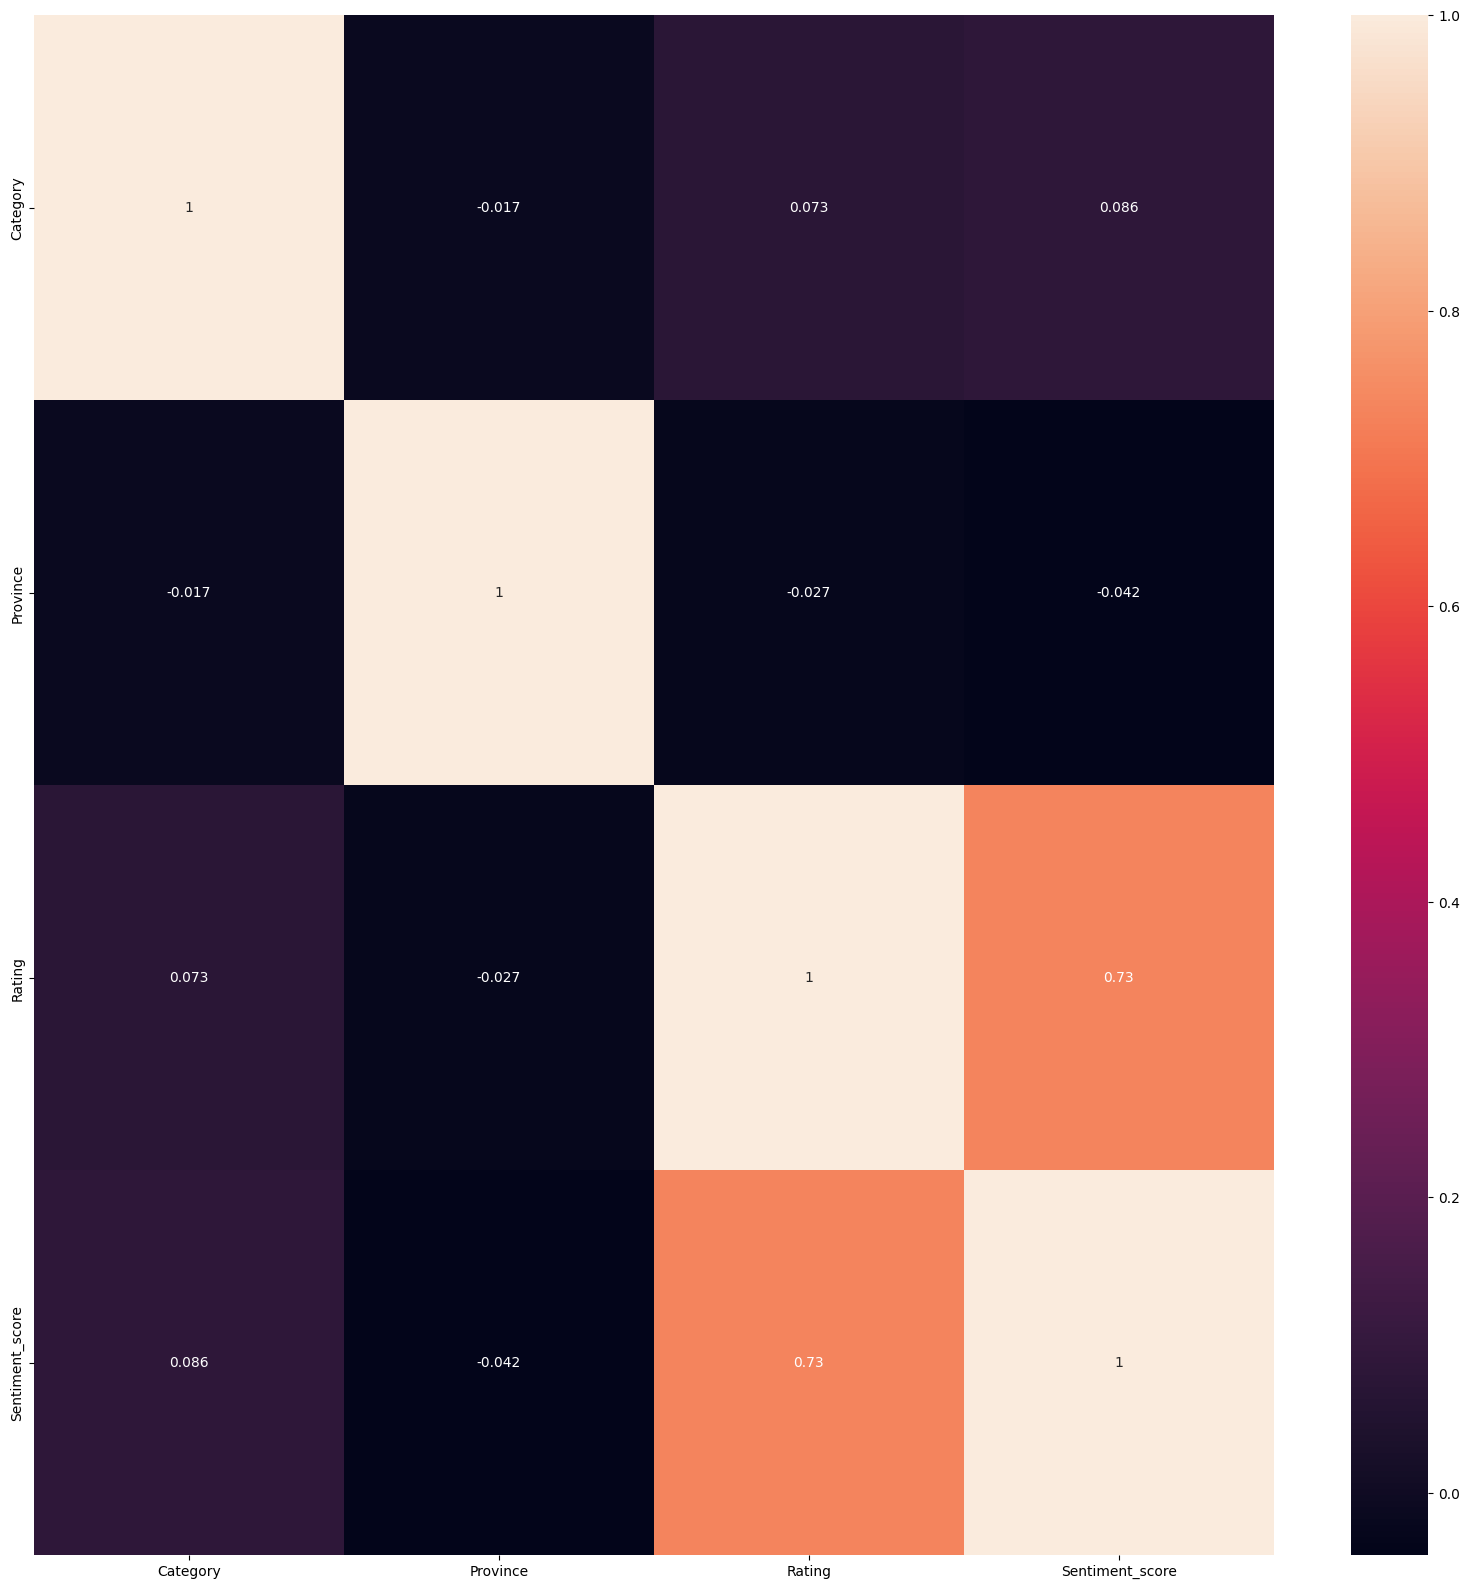

In [23]:
plt.figure(figsize = (20,20))
sns.heatmap(my_data.corr(), annot = True)
plt.show()

#Depedent and independent variable

In [25]:
X = data.iloc[:,[1,3,6,8,9]]
y = data['Rating']


In [26]:
X

,Category,Province,Rating,Sentiment_score,Sentiment
0,41,0,5.0,0.9607,1
1,41,0,2.0,0.1966,0
2,41,0,3.0,0.8198,1
3,41,0,5.0,0.9287,1
4,41,0,5.0,0.5613,1
...,...,...,...,...,...
5015,2,5,5.0,0.7902,1
5016,2,5,5.0,0.0000,0
5017,2,5,5.0,0.5719,1
5018,2,5,5.0,0.5994,1


In [27]:
y

0       5.0
1       2.0
2       3.0
3       5.0
4       5.0
       ... 
5015    5.0
5016    5.0
5017    5.0
5018    5.0
5019    5.0
Name: Rating, Length: 4805, dtype: float64

#Splitting data into train and test set

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=10)

In [29]:
X_train

,Category,Province,Rating,Sentiment_score,Sentiment
2952,63,4,5.0,0.8883,1
2670,16,2,5.0,0.9349,1
352,36,3,2.0,-0.9246,0
1306,14,5,5.0,0.9375,1
1092,64,4,5.0,0.9552,1
...,...,...,...,...,...
1180,6,5,5.0,0.9635,1
3444,17,0,5.0,0.9100,1
1344,36,5,5.0,0.2732,0
4837,17,5,2.0,0.7102,1


In [30]:
y_train

2952    5.0
2670    5.0
352     2.0
1306    5.0
1092    5.0
       ... 
1180    5.0
3444    5.0
1344    5.0
4837    2.0
1289    4.0
Name: Rating, Length: 3363, dtype: float64

#Modeling

#Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

#predict the test set
y_pred = lr.predict(X_test)

## Evaluate the model
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

1.0


#Decision Tree Regression

In [32]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(min_samples_leaf=0.01)

dtr.fit(X_train,y_train)

# Predict the test ser
y_pred  = dtr.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred))

1.0


#Random Forest Regressor

In [33]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=.0001)
rfr.fit(X_train,y_train)

# Predict the test ser
y_pred  = rfr.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred))

1.0


#Support vector Regressor

In [34]:
from sklearn.svm import SVR
svr = SVR(kernel ='rbf')

svr.fit(X_train, y_train)

# predict the test set
y_pred = svr.predict(X_test)

# Evaluate the performance
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.9916077063718862


# Extra tree Regressor

In [35]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(n_estimators = 120)

etr.fit(X_train, y_train)

# predict the test set
y_pred = etr.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

1.0


An R-squared (R2) score of 1.0 is an excellent outcome for a linear regression model. A perfect R2 score of 1.0 means that the model perfectly fits the data, and it can explain 100% of the variance in the dependent variable using the independent variables. This is the best possible score for R2, indicating that the model's predictions match the actual target values perfectly.